In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Model based segmentation

As far, we considered the image segmentation as a bottom-up process, where connected pixels are grouped together based on some sort of rule based on gray levels, borders etc.

In some cases, one know *a priori* the object we are looking for.

An example was already given when looking for lines and circles using the Hough transform.

We will see in this chapter other method using this top-down approach.

## Live-wire

The live-wire algorithm is an interactive segmentation method that helps the user to delineate object borders in an image. The user select some points located near the object boundary and the algorithm connect them using a best path strategy.

### Dijkstra shortest path algorithm

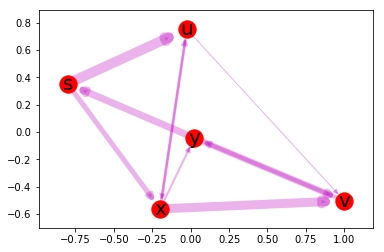

In [2]:
import networkx as nx
G=nx.DiGraph()
G.add_weighted_edges_from([('y','s',7),('y','v',6),('x','y',2),('x','u',3),('x','v',9),
                          ('s','x',5),('s','u',10),('u','x',2),('u','v',1),('v','y',4)])

pos=nx.spring_layout(G) 
edgewidth=[]
for (u,v,d) in G.edges(data=True):
    edgewidth.append(d['weight'])
    
nx.draw_networkx_nodes(G,pos=pos)
nx.draw_networkx_labels(G,pos=pos,font_size=20,font_family='sans-serif')
nx.draw_networkx_edges(G,pos,alpha=0.3,width=edgewidth, edge_color='m',arrows=True);

In [3]:
path = dict(nx.all_pairs_dijkstra_path(G))
print(path['s']['v'])
print(path['v']['s'])

['s', 'x', 'u', 'v']
['v', 'y', 's']
